# Chapter 2 - Supervised Learning

In [83]:
%matplotlib inline
import numpy as np
import mglearn as mglearn
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_boston


In [24]:
#Sample data
X, y = mglearn.datasets.make_forge()

X.shape: (26, 2)


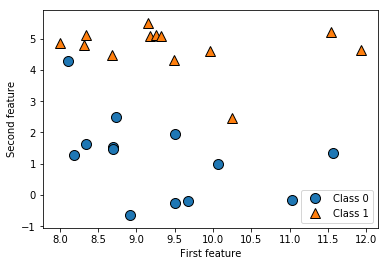

In [46]:
#plot
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc = 4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

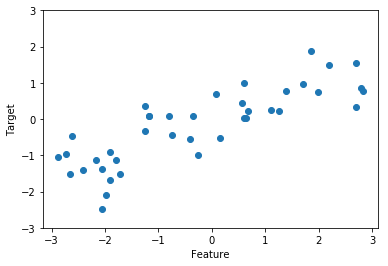

In [53]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [63]:
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [67]:
boston = load_boston()

In [72]:
X, y = mglearn.datasets.load_extended_boston()
format(X.shape)


'(506, 104)'

# k-Nearest Neighbors

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

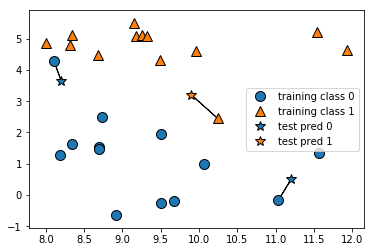

In [88]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

In [92]:
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [93]:
clf = KNeighborsClassifier(n_neighbors=3)

In [96]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [98]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


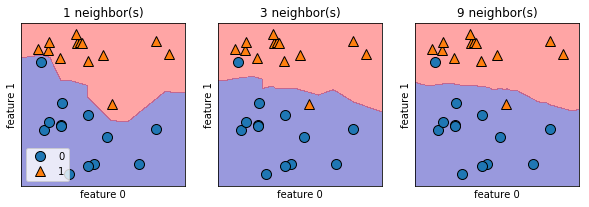

In [101]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
# the fit method returns the object self, so we can instantiate
# and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

Considering more and more neighbors leads to a smoother decision boundary. A smoother boundary corresponds to a
simpler model. In other words, using few neighbors corresponds to high model complexity (as shown on the right side of Figure 2-1), and using many neighbors corresponds to low model complexity (as shown on the left side of Figure 2-1).

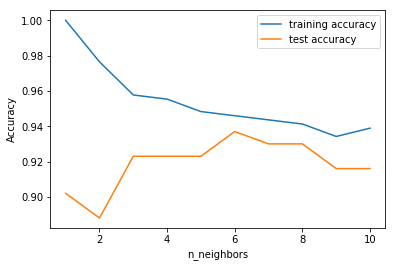

In [133]:
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=66)
training_accuracy = []
test_accuracy = []

# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()


# k-neighbors regression


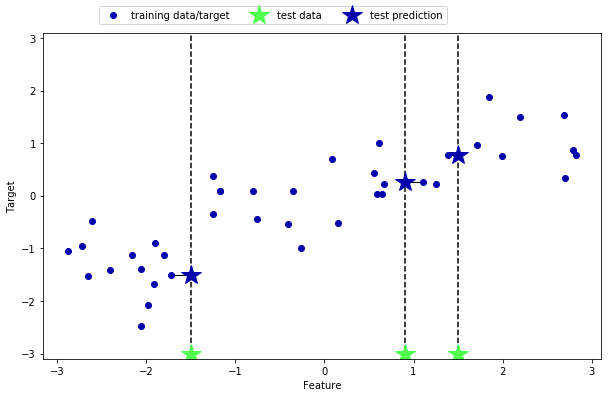

In [137]:
from sklearn.neighbors import KNeighborsRegressor
mglearn.plots.plot_knn_regression(n_neighbors=1)

In [142]:
X, y = mglearn.datasets.make_wave(n_samples=40)

# split the wave dataset into training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)

# fit the model using the training data and training targets
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [150]:
# Make predictions on test set
format(reg.predict(X_test))

'[-0.76885025  0.16870118  0.81020743 -1.49113268 -1.49113268 -1.35931037\n  0.16870118  0.90283566 -0.13712298 -1.49113268]'

In [149]:
# Check R^2
format(reg.score(X_test, y_test))

'0.6541236379533191'

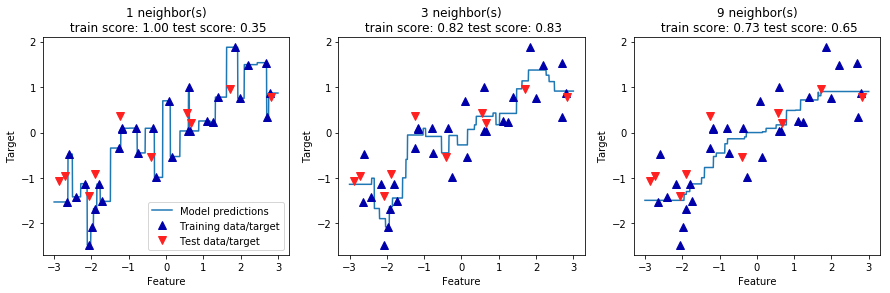

In [148]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title(
    "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
    n_neighbors, reg.score(X_train, y_train),
    reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
"Test data/target"], loc="best")

As we can see from the plot, using only a single neighbor, each point in the training
set has an obvious influence on the predictions, and the predicted values go through
all of the data points. This leads to a very unsteady prediction. Considering more
neighbors leads to smoother predictions, but these do not fit the training data as well.

# Linear Models


w[0]: 0.393906  b: -0.031804


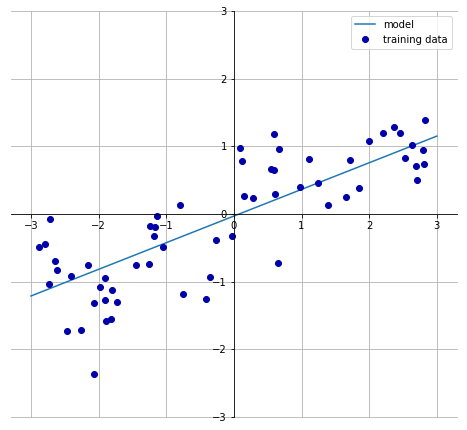

In [152]:
mglearn.plots.plot_linear_regression_wave()

**Linear Regression**

In [172]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
lr = LinearRegression().fit(X_train, y_train)

# Coeficient
print("Coefficient: ", lr.coef_, "\n Intercept: ", lr.intercept_)

Coefficient:  [ 0.39390555] 
 Intercept:  -0.0318043430268


In [176]:
print("Training set score: ", lr.score(X_train, y_train), "\n Test set score: ", lr.score(X_test, y_test))
# Low R^2 here and being relatively close together suggests underfit, 
# but model is fairly simple with only one feature

Training set score:  0.670089031508 
 Test set score:  0.659336859686


In [179]:
# Load more complex model from Boston
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)


In [183]:
print("Training set score", lr.score(X_train, y_train), "\n Test set score", lr.score(X_test, y_test))
# Large difference suggests overfitting

Training set score 0.952352643686 
 Test set score 0.605775489294


**Ridge Regression**